<a href="https://colab.research.google.com/github/kadamhari825/Market-Capital-Appreciation-EDA/blob/main/Market_Capital_Appreciation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required Libriries

import pandas as pd          # Pandas for Data Manupalation
import numpy as np           # Numpy for Numerical operations

# Visulatization Stack
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MarketCap.csv')  # Loading data
df.head()

,S.No,Company,Country,Sector,Market cap ($bn),Market cap added,Change
0,1,Amazon,US,Consumer discretionary,"1,317.30",401.1,43.8
1,2,Microsoft,US,Technology,"1,473.00",269.9,22.4
2,3,Apple,US,Technology,"1,523.90",219.1,16.8
3,4,Tesla,US,Consumer discretionary,183.8,108.4,143.8
4,5,Tencent,China,Communication services,550.9,93.1,20.3


In [3]:
original_df = df.copy()           # Making Deep Copy of Original dataframe

### Data Exploration and cleaning 

In data exploration we try to understand various features in data, so that it will help us to connect the dots.And data cleaning is the process of ensuring that your data is correct and useable by identifying any errors in the data, or missing 
data by correcting or deleting them. The goal of cleaning operations is to prevent problems caused by missing data that
can arise while using stastical features or model training.

In [4]:
print("The shape of dataframe is:",df.shape)

The shape of dataframe is: (100, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No              100 non-null    int64  
 1   Company           100 non-null    object 
 2   Country           100 non-null    object 
 3   Sector            100 non-null    object 
 4   Market cap ($bn)  100 non-null    object 
 5   Market cap added  100 non-null    float64
 6   Change            100 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [6]:
# Changing Datatype of a column of Data frame so that we can perform Numerical calculations on it.

df['Market cap ($bn)'] = pd.to_numeric(df['Market cap ($bn)'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No              100 non-null    int64  
 1   Company           100 non-null    object 
 2   Country           100 non-null    object 
 3   Sector            100 non-null    object 
 4   Market cap ($bn)  97 non-null     float64
 5   Market cap added  100 non-null    float64
 6   Change            100 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ KB
None


### Filling Missing Values

Filling missing values can be done by sevaral methods(mean, median ,mode or absolute value) and It is depended upon what is type of feature variabe i.e wheather it is Continous or Categorical in nature.In our case Market Cap is continous variable is continous and can be imputed by their specific values in dataframe.

In [7]:
df[df['Market cap ($bn)'].isna()]

,S.No,Company,Country,Sector,Market cap ($bn),Market cap added,Change
0,1,Amazon,US,Consumer discretionary,NaN,401.1,43.8
1,2,Microsoft,US,Technology,NaN,269.9,22.4
2,3,Apple,US,Technology,NaN,219.1,16.8


In [8]:
df.columns

Index(['S.No', 'Company', 'Country', 'Sector', 'Market cap ($bn)',
       'Market cap added', 'Change'],
      dtype='object')

In [9]:
# we are inserting their values in places of 'nan' values that we got by pd_numeric(Coerce) method.

df.loc[df['Company'] == 'Amazon', 'Market cap ($bn)'] = 1317.30 
df.loc[df['Company'] == 'Microsoft', 'Market cap ($bn)'] = 1473.0 
df.loc[df['Company'] == 'Apple', 'Market cap ($bn)'] = 1523.9

# Adding another columns which will tell what was inital capital of that company.
df['Market Cap Prior'] = df['Market cap ($bn)'] - df['Market cap added'] 

# Changing order in whcih columns will appear in Dataframe
df = df.reindex(['S.No', 'Company', 'Country', 'Sector','Market Cap Prior','Market cap ($bn)',
                 'Market cap added', 'Change'], axis=1)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No              100 non-null    int64  
 1   Company           100 non-null    object 
 2   Country           100 non-null    object 
 3   Sector            100 non-null    object 
 4   Market Cap Prior  100 non-null    float64
 5   Market cap ($bn)  100 non-null    float64
 6   Market cap added  100 non-null    float64
 7   Change            100 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.4+ KB
None


We have filled missing value now and added derived column from existing column.

In [11]:
# statistical summary of all numerical features.
df.describe()

,S.No,Market Cap Prior,Market cap ($bn),Market cap added,Change
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,115.899000,146.442000,30.543000,59.395000
std,29.011492,225.961189,269.912133,52.844587,61.721631
min,1.000000,3.000000,13.400000,8.200000,4.500000
25%,25.750000,20.975000,34.550000,10.600000,20.375000
50%,50.500000,41.350000,59.700000,14.200000,43.100000
75%,75.250000,113.200000,136.175000,27.150000,72.450000
max,100.000000,1304.800000,1523.900000,401.100000,408.700000


#### Inferences

1. On an average 30$bn market capital added to these companies across the industries.
2. % Market capital infusion is huge  and that  stood around 59.4.

### Sector wise Distribution of Companies:

These top 100 companies represent 10 sectors 

Healthcare                25
Technology                23
Consumer discretionary    21
Communication services    10
Consumer staples           8
Real estate                5
Industrials                3
Materials                  3
Financials                 1
Energy                     1
Name: Sector, dtype: int64 /n


Text(0.5, 1.0, 'Sectors and Numbers of Conpanies ')

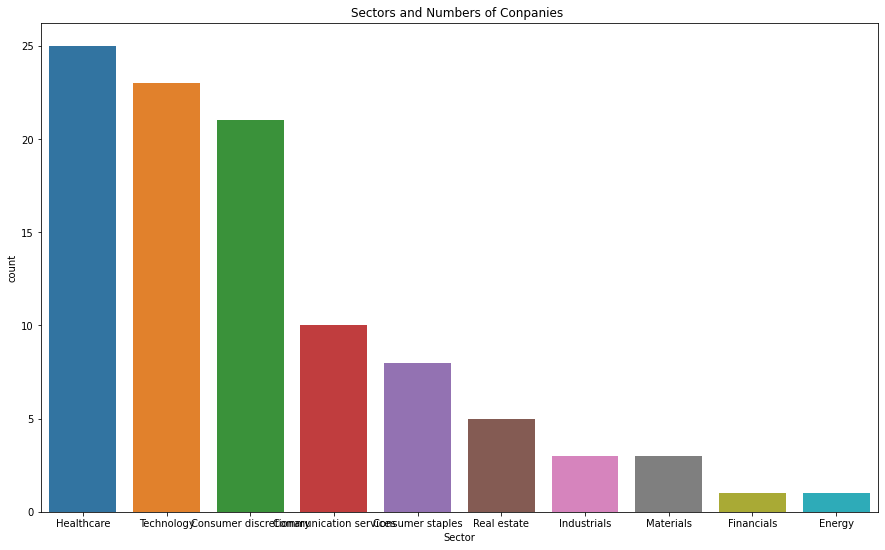

In [12]:
print(f"These top 100 companies represent {df['Sector'].nunique()} sectors",'\n')

print(df['Sector'].value_counts(),'/n')

fig = plt.figure(figsize=(15, 9))
ax = sns.countplot(x='Sector', data=df, order=df['Sector'].value_counts().index)
ax.set_title('Sectors and Numbers of Conpanies ')

Number of companies from healthcare is dominating among all because of COVID-19 cricis and it lead people to go 
digital that from working from home to buying groceries Online.But let's find out that wheather Healthcare and Tech
companies capital appreciated more than the others.

### Sector wise % Capital added.

Sector
Technology                1024.9
Consumer discretionary     914.1
Communication services     442.3
Healthcare                 406.2
Consumer staples           112.1
Real estate                 67.8
Industrials                 37.5
Materials                   28.5
Financials                  11.9
Energy                       9.0
Name: Market cap added, dtype: float64 



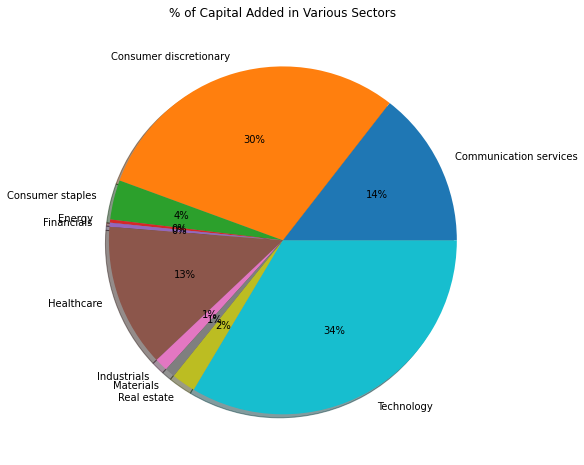

In [13]:
labels_df = pd.DataFrame(df.groupby(by = 'Sector'))[0]
labels = labels_df.values

Sector_values_df = pd.DataFrame(df.groupby(by = 'Sector',)['Market cap added'].sum())
values = Sector_values_df['Market cap added'].values

print(df.groupby(by = 'Sector',)['Market cap added'].sum().sort_values(ascending= False),'\n')

plt.figure(figsize=(8,8))
plt.pie(values, labels = labels,autopct='%.0f%%', shadow  = True,)
plt.title('% of Capital Added in Various Sectors')
plt.show()

Though number of comapanies in Healthcare whos Market capital got appriciated are highest, Technology and Consumer
discretionary sector companies got actual investment 34% and 30% respectively.That is way higher than Healthcare domain.

### Country wise distribution of companies

Country
US             47
China          23
Netherlands     5
Canada          3
Switzerland     3
South Korea     3
Japan           3
France          2
Singapore       1
UK              1
UAE             1
Sweden          1
Argentina       1
Australia       1
India           1
Hong Kong       1
Germany         1
Denmark         1
Ireland         1
Name: Company, dtype: int64 



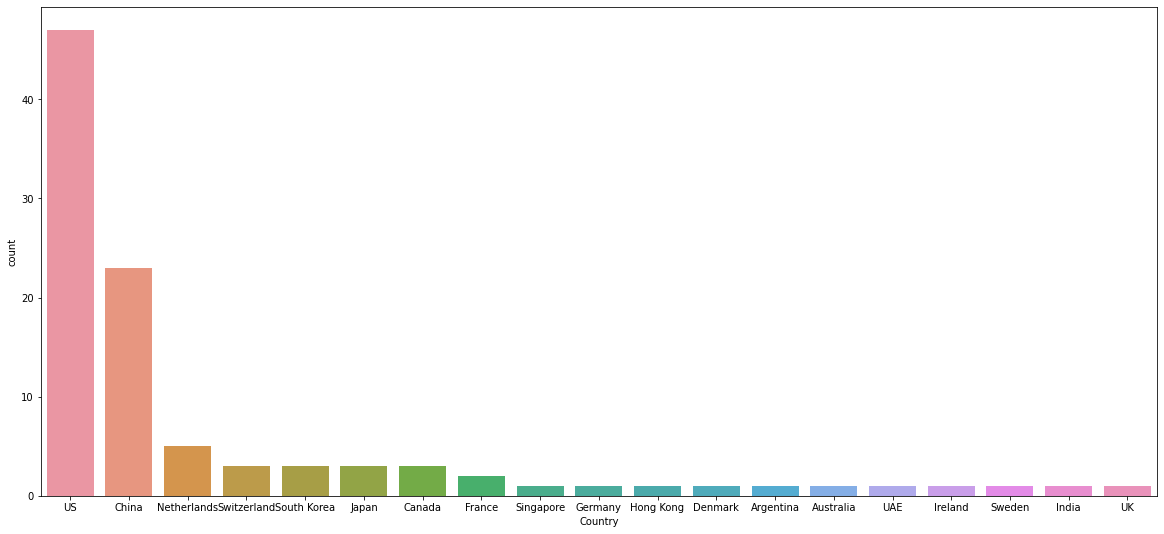

In [14]:
print(df.groupby(by = 'Country')['Company'].count().sort_values(ascending = False),'\n')

plt.figure(figsize=(20, 9))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)


Clearly half of top 100 companies come from US and nearly a quarter of those belong to China.
Lets see wheather this story replicate in Market capital added in respective countries.

### Total Capital added in respective countries.

In [15]:
df_country_marketcap  = pd.DataFrame(df.groupby(by = 'Country')['Market cap added'].sum().sort_values(ascending = False))
df_country_marketcap = df_country_marketcap.reset_index()
print(df_country_marketcap)

        Country  Market cap added
0            US            2018.7
1         China             509.0
2   Netherlands              89.0
3        Canada              71.0
4         Japan              59.7
5   Switzerland              52.9
6   South Korea              40.3
7       Germany              37.8
8     Singapore              31.9
9     Hong Kong              20.2
10      Denmark              19.8
11       France              19.4
12    Argentina              18.1
13    Australia              14.2
14          UAE              12.6
15      Ireland              11.5
16       Sweden              10.4
17        India               9.0
18           UK               8.8


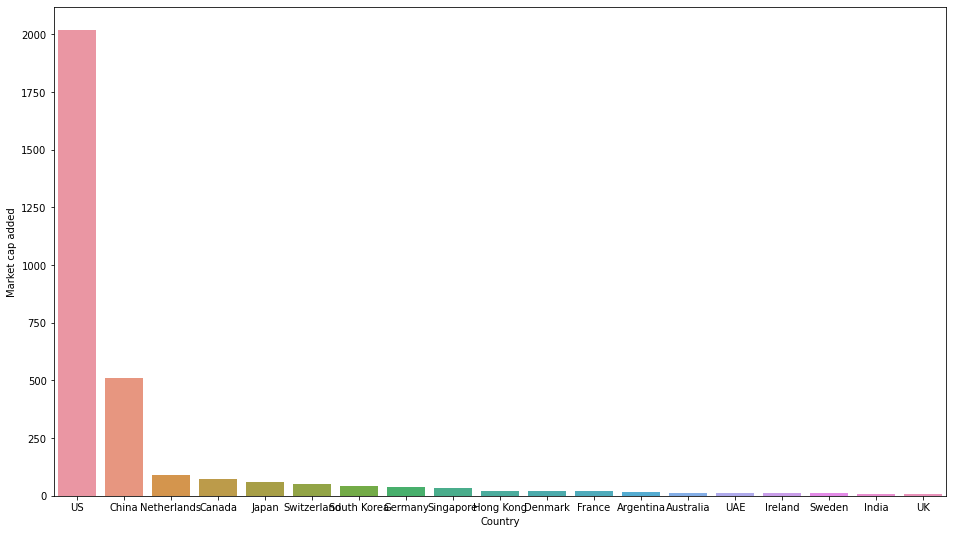

In [16]:
plt.figure(figsize = (16,9))
sns.barplot(x = 'Country', y = 'Market cap added',data  = df_country_marketcap)

Indeed, the above story repicated in actual capital invested in respective countries. US and Chinese companies market capital appreciared the most and outweigh the rest of the world.

In [17]:
df[df['Country']=='India']

,S.No,Company,Country,Sector,Market Cap Prior,Market cap ($bn),Market cap added,Change
88,89,Reliance Industries,India,Energy,125.5,134.5,9.0,7.2


Reliance is the only Firm company which come in Top 100 list.


#### Total Capital added in respective countries highest to lowest:

In [18]:
df[['Company','Market cap added']].head(10)

,Company,Market cap added
0,Amazon,401.1
1,Microsoft,269.9
2,Apple,219.1
3,Tesla,108.4
4,Tencent,93.1
5,Facebook,85.7
6,Nvidia,83.3
7,Alphabet,68.1
8,PayPal,65.4
9,T-Mobile US,59.7


In [19]:
px.bar(df, x='Company', y='Market cap added')

Amazon a Consumer discretionary seller, Microsoft and Apple (tech companies) are top companies in which highest market capital invested in pandemic period.

### %capital change vs Countries from highest to lowest:

In [20]:
df_sort_change = df.sort_values(by = 'Change', ascending  = False)
df_sort_change[['Company','Change']].head(10)


,Company,Change
55,International Holdings,408.7
35,Moderna,277.6
14,Zoom Video,255.1
22,Sea Group,171.1
98,GSX Techedu,160.1
91,Just Eat Takeaway,159.8
29,Alibaba Health Information Technology,145.3
3,Tesla,143.8
99,Teladoc Health,136.0
72,Wayfair,128.1


In [21]:
px.bar(df_sort_change, x='Company', y='Change',height=600,color  ='Company')

% change in capital happened in totally different and diverse sectors from Finance,Healthcare and tech, which is 
contradictory of our initial assumption.

In [22]:
df_marketCap_Prior_after = df.sort_values(by = 'Market cap added', ascending  = False)
px.bar(df_marketCap_Prior_after, x='Company', y=['Market Cap Prior','Market cap added'],height=600,color='Company')


#### Technology

In [23]:
df_tech = df[df['Sector'] == 'Technology'].sort_values(by = 'Market cap added', ascending  = False)
df_tech[['Company','Sector','Market cap added']]

,Company,Sector,Market cap added
1,Microsoft,Technology,269.9
2,Apple,Technology,219.1
6,Nvidia,Technology,83.3
8,PayPal,Technology,65.4
13,Shopify,Technology,51.5
14,Zoom Video,Technology,48.0
16,Adobe,Technology,40.1
24,ASML,Technology,27.3
27,ServiceNow,Technology,23.2
32,Salesforce,Technology,19.2


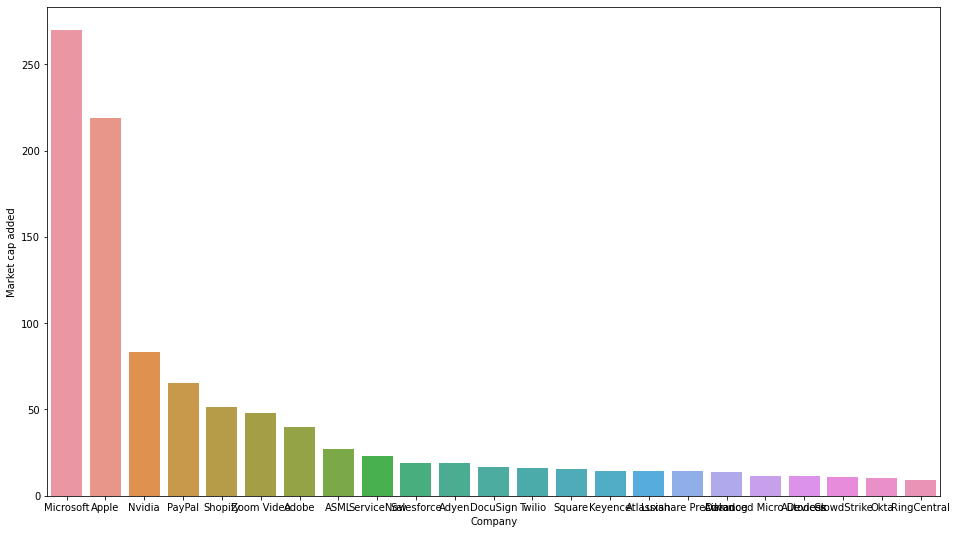

In [24]:
plt.figure(figsize = (16,9))
sns.barplot(x = 'Company', y = 'Market cap added', data  = df_tech)

Microsoft and Apples market capital rose more than double of every other company in this domain.

#### Consumer discretionary 

                          Company                  Sector  Market cap added
0                          Amazon  Consumer discretionary             401.1
3                           Tesla  Consumer discretionary             108.4
10                      Pinduoduo  Consumer discretionary              55.2
12               Meituan Dianping  Consumer discretionary              53.7
15                         JD.com  Consumer discretionary              44.4
17                           Audi  Consumer discretionary              37.8
21                        Alibaba  Consumer discretionary              32.8
23                     Home Depot  Consumer discretionary              31.6
26                         Prosus  Consumer discretionary              24.7
36                   MercadoLibre  Consumer discretionary              18.1
64          Flutter Entertainment  Consumer discretionary              11.5
72                        Wayfair  Consumer discretionary              10.8
74          

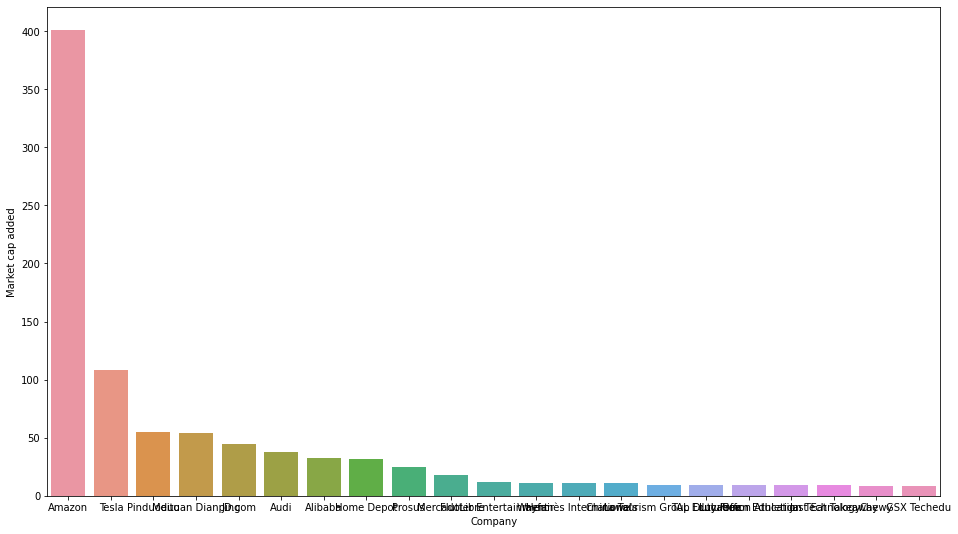

In [25]:
df_ConDis = df[df['Sector'] == 'Consumer discretionary'].sort_values(by = 'Market cap added', ascending  = False)
print(df_ConDis[['Company','Sector','Market cap added']],'\n')

plt.figure(figsize = (16,9))
sns.barplot(x = 'Company', y = 'Market cap added', data  = df_ConDis)

Amaxon and Tesla benefitted the most in Consumer discretionary sector.

#### Communication services

In [26]:
df_comm = df[df['Sector'] == 'Communication services'].sort_values(by = 'Market cap added', ascending  = False)
df_comm[['Company','Sector','Market cap added']]

,Company,Sector,Market cap added
4,Tencent,Communication services,93.1
5,Facebook,Communication services,85.7
7,Alphabet,Communication services,68.1
9,T-Mobile US,Communication services,59.7
11,Netflix,Communication services,55.1
22,Sea Group,Communication services,31.9
38,NetEase,Communication services,17.1
56,Activision Blizzard,Communication services,12.5
76,Spotify,Communication services,10.4
95,Snap,Communication services,8.7


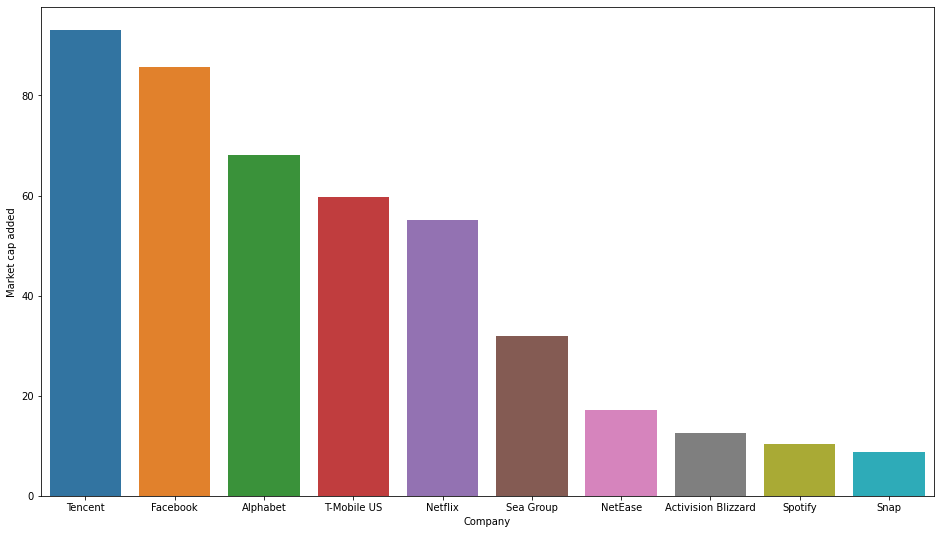

In [27]:
plt.figure(figsize = (16,9))
sns.barplot(x = 'Company', y = 'Market cap added', data = df_comm )

Tiktoks parent company Tencent, facebook and Alphabet, googles aparent company are the top contenders in communication 
services in term of market captal received.

#### Healthcare

In [28]:
df_health = df[df['Sector'] == 'Healthcare'].sort_values(by = 'Market cap added', ascending = False)
df_health[['Company','Sector','Market cap added']]

,Company,Sector,Market cap added
18,AbbVie,Healthcare,37.8
20,Chugai Pharmaceutical,Healthcare,33.9
25,Roche,Healthcare,27.1
28,Regeneron Pharmaceuticals,Healthcare,20.2
29,Alibaba Health Information Technology,Healthcare,20.2
30,Samsung Biologics,Healthcare,20.0
31,Novo Nordisk,Healthcare,19.8
34,Eli Lilly,Healthcare,18.8
35,Moderna,Healthcare,18.1
37,Dexcom,Healthcare,17.2


In [29]:
px.bar(df_health, x='Company', y='Market cap added',height=600,color  ='Company')

AbbVie,Chugai Pharmaceutical and Roche in healthcare got highest market capital.

### Conclusion:


1. Though number of companies in healthcare domain benifitted more than any other sector, but Technology and Consumer 
   discretionary domains got highest investments.
2. Investments in US companies outweighted rest of the world.It amounts to 2018 Billion dollers.
3. Highest % investment change happend in International Holdings a investment firm located in UAE and Moderna the COVID-19
   vaccine maker respectively. And those do not belong to tech sector.
4. In tech sector Microsoft and Apple had highest market capital infusion in pandamic.
5. Amazon and Tesla had highest market capital investment in Consumer discretionary sector.
6. AbbVie,Chugai Pharmaceutica and Roche could get highest investment in Healthcare domain.